## Violating Local Realism

Using Qiskit to calculate the CHSH inequality

In this demo, we will use Qiskit to prove that we can violate local realism. We will make use of IBMs quantum computers in making our computations 

1. Import the needed Python libraries

In [1]:
import numpy as np  
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
from math import pi

2. Import the Qiskit libraries

In [2]:
import qiskit as q
from qiskit import IBMQ, transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector

3. Add import to help track jobs on ibmq

In [3]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

4. Write helper method to return the counts for a specific measured state Q, R, S, or T.
   The input of the helper method is the counts obtained from simulation and a measured state, either Q, R, S, or T
   The output of the method is statistical count for a measured state if it's present else the return value is 0

In [4]:
def check(counts,name):
    try:
        return counts[name]
    except:
        return 0

5. Writing Actual code to calculate the CHSH inequality on an actual ibm quantum computer

In [5]:
def construct_circuit(cor_name, theta):
    # make the bell paiir
    circuit = q.QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0,1)
    # perform the correct bell angle measurement based on cor_name (pair selected) 
    # 0 -> Alice and 1 -> Bob
    # Circuit.ry(theta, i) => rotation along y-axis by theta on qubit i
    if cor_name == 'QS':
        circuit.ry(-theta,1)          
    elif cor_name =='RS': 
        circuit.ry(-2*theta,0)
        circuit.ry(-theta,1)
    elif cor_name == 'QT':
        circuit.ry(-3*theta,1)
    elif cor_name == 'RT':
        circuit.ry(-2*theta,0)
        circuit.ry(-3*theta,1)
    # measure the circuit    
    circuit.measure([0,1],[0,1])
    return circuit

provider = IBMQ.load_account()
backend = least_busy(provider.backends(simulator=False))
nshots = 1000

# Different pairs of measurements
cor_name_list = ['QS','RS','QT','RT']

theta = pi/4
E = {}
circs = []

# bundliing up circuits so they run in parallel
for cor_name in cor_name_list:
    circs.append(construct_circuit(cor_name, theta))
    
# Need to transpile the circuits first.
circs = transpile(circs, backend=backend)

# Use Job Manager to break the circuits into multiple jobs.
job_manager = IBMQJobManager()
print("running jobs ..")
results = job_manager.run(circs, backend=backend, shots=nshots).results()

for i, cor_name in enumerate(cor_name_list):
    # runs to get statistical frequencies 
    counts = results.get_counts(i)
    # Quantum correlations between Alice and Bob   
    E[cor_name] = check(counts,'11')/nshots\
        + check(counts,'00')/nshots\
        - check(counts,'01')/nshots\
        - check(counts,'10')/nshots
    
S = E['QS'] + E['RT'] + E['RS'] - E['QT']
print("S = ", S)
print("theta in rad = ", theta)
print("Ideal S value = ", np.sqrt(2)*2)

running jobs ..
S =  2.268
theta in rad =  0.7853981633974483
Ideal S value =  2.8284271247461903


## 7. Exercices

(a) Generate all Bell pairs


In [6]:
# Importing everything
from qiskit import *
from qiskit.visualization import plot_histogram

To create an entangled pair, we needed to do a H-gate followed by a CNOT. Let's create a function that takes a QuantumCircuit and entangles the qubits with indices a and b:

In [7]:
def entangle(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

There are 4 possible inputs we can start with to generate different bell pais ie. |00>, |01>, |10>, |11>

In [8]:
def encode_input(qc, qubit_1, qubit_2, msg):
    if msg == "00":
        pass    # To send 00 we do nothing
    elif msg == "10":
        qc.x(qubit_1) # To send 10 input
    elif msg == "01":
        qc.x(qubit_2) # To send 01 input
    elif msg == "11":
        qc.x(qubit_1) # To send 11 input
        qc.x(qubit_2) # followed by an X-gate
    else:
        print("Invalid Message: Sending '00'")

We also need a way to ensure we measure using the same basis 

In [9]:
def decode(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

Finally, we can put this together 

In [10]:
# Create the quantum circuit with 2 qubits
qc = QuantumCircuit(2)

message_arr = ["00", "01", "10", "11"]

for message in message_arr:
    print("here")
    encode_input(qc, 0, 1, message)
    entangle(qc, 0, 1)
    decode(qc, 0, 1)
    qc.measure_all()
    qc.draw(output = "mpl")

here
here
here
here



(b) Does entanglement work for 3 qubits?

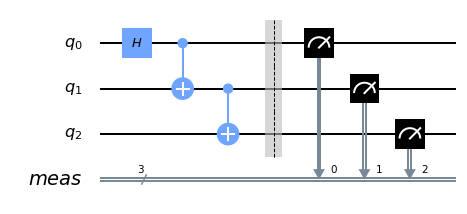

In [11]:
# Create the quantum circuit with 3 qubits
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()
qc.draw(output = "mpl")